In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
import seaborn as sns
from glob import glob

In [25]:
def train_data(train_path):
   classes, class_paths = zip(*[(label, os.path.join(train_path, label, image))
                                 for label in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, label))
                                 for image in os.listdir(os.path.join(train_path, label))])

   train_dataset = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
   return train_dataset

In [26]:
def test_data(test_path):
   classes, class_paths = zip(*[(label, os.path.join(test_path, label, image))
                                 for label in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, label))
                                 for image in os.listdir(os.path.join(test_path, label))])

   test_dataset = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
   return test_dataset

In [27]:
train_dataset = train_data('./Training')
test_dataset = test_data('./Testing')

In [28]:
train_dataset

,Class Path,Class
0,./Training\glioma\Tr-glTr_0000.jpg,glioma
1,./Training\glioma\Tr-glTr_0001.jpg,glioma
2,./Training\glioma\Tr-glTr_0002.jpg,glioma
3,./Training\glioma\Tr-glTr_0003.jpg,glioma
4,./Training\glioma\Tr-glTr_0004.jpg,glioma
...,...,...
5707,./Training\pituitary\Tr-pi_1452.jpg,pituitary
5708,./Training\pituitary\Tr-pi_1453.jpg,pituitary
5709,./Training\pituitary\Tr-pi_1454.jpg,pituitary
5710,./Training\pituitary\Tr-pi_1455.jpg,pituitary


In [29]:
test_dataset

,Class Path,Class
0,./Testing\glioma\Te-glTr_0000.jpg,glioma
1,./Testing\glioma\Te-glTr_0001.jpg,glioma
2,./Testing\glioma\Te-glTr_0002.jpg,glioma
3,./Testing\glioma\Te-glTr_0003.jpg,glioma
4,./Testing\glioma\Te-glTr_0004.jpg,glioma
...,...,...
1306,./Testing\pituitary\Te-pi_0295.jpg,pituitary
1307,./Testing\pituitary\Te-pi_0296.jpg,pituitary
1308,./Testing\pituitary\Te-pi_0297.jpg,pituitary
1309,./Testing\pituitary\Te-pi_0298.jpg,pituitary


C:\Users\raywi\AppData\Local\Temp\ipykernel_24936\4093425298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=train_dataset, y='Class', palette='viridis')


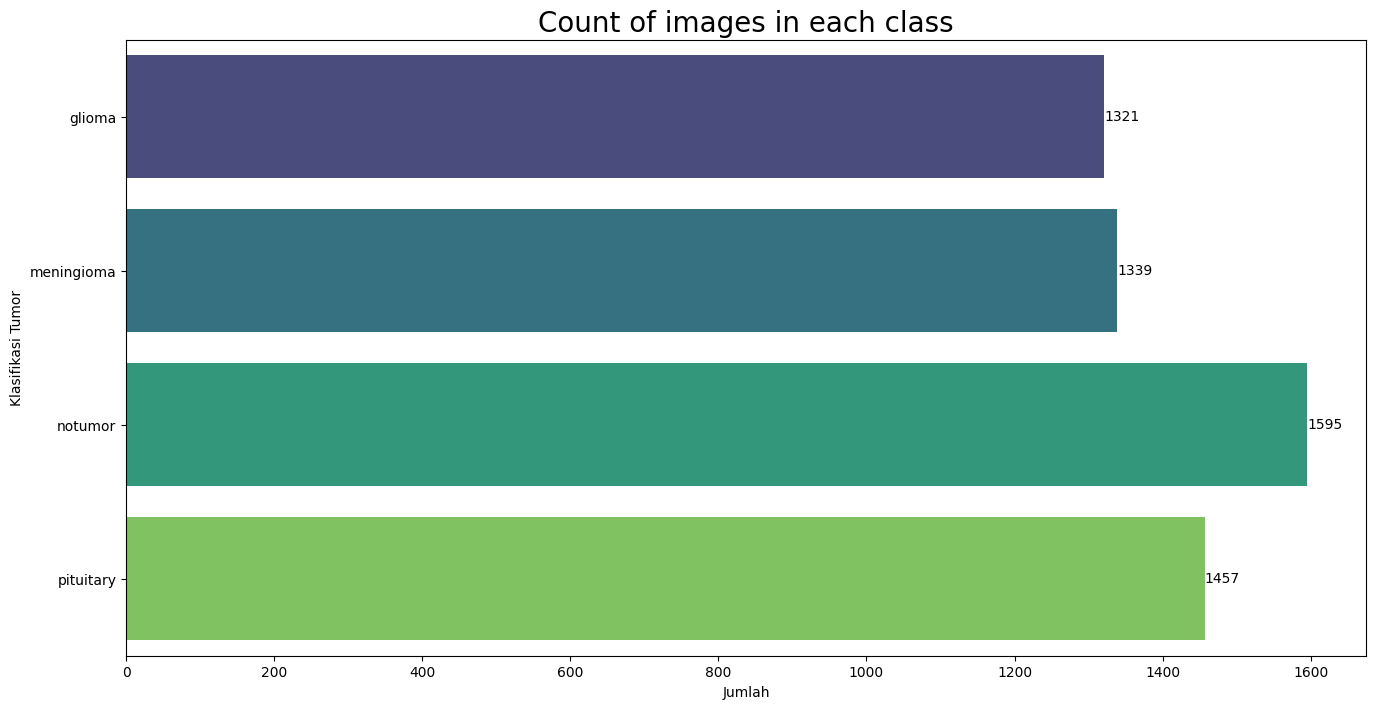

In [30]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=train_dataset, y='Class', palette='viridis')

plt.xlabel('Jumlah')
plt.ylabel('Klasifikasi Tumor')
plt.title('Count of images in each class', fontsize=20)

for container in ax.containers:
   ax.bar_label(container)

plt.show()

C:\Users\raywi\AppData\Local\Temp\ipykernel_24936\1078717581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=test_dataset['Class'], palette='viridis')


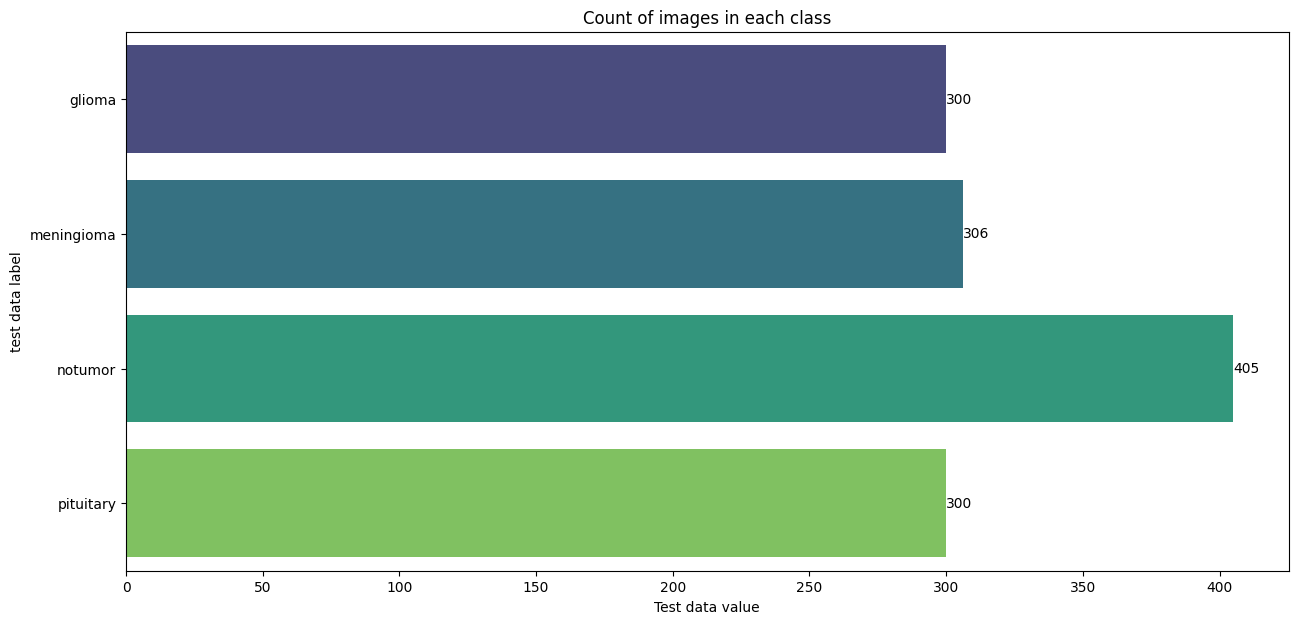

In [31]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=test_dataset['Class'], palette='viridis')

ax.set(xlabel='Test data value', ylabel='test data label', title='Count of images in each class')

for container in ax.containers:
   ax.bar_label(container)

plt.show()

In [32]:
from sklearn.model_selection import train_test_split
validation_dataset, test_dataset = train_test_split(test_dataset, test_size=0.5, random_state=42)

In [33]:
validation_dataset

,Class Path,Class
7,./Testing\glioma\Te-glTr_0007.jpg,glioma
666,./Testing\notumor\Te-no_0060.jpg,notumor
1074,./Testing\pituitary\Te-pi_0063.jpg,pituitary
357,./Testing\meningioma\Te-me_0057.jpg,meningioma
329,./Testing\meningioma\Te-me_0029.jpg,meningioma
...,...,...
1095,./Testing\pituitary\Te-pi_0084.jpg,pituitary
1130,./Testing\pituitary\Te-pi_0119.jpg,pituitary
1294,./Testing\pituitary\Te-pi_0283.jpg,pituitary
860,./Testing\notumor\Te-no_0254.jpg,notumor


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                        brightness_range=(0.8, 1.2))

test_gen = ImageDataGenerator(rescale=1/255)


train_gen = _gen.flow_from_dataframe(train_dataset, x_col='Class Path',
                                 y_col='Class', batch_size=batch_size,
                                 target_size=img_size)

validation_gen = _gen.flow_from_dataframe(validation_dataset, x_col='Class Path',
                                    y_col='Class', batch_size=batch_size,
                                    target_size=img_size)

test_gen = test_gen.flow_from_dataframe(test_dataset, x_col='Class Path',
                                 y_col='Class', batch_size=16,
                                 target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


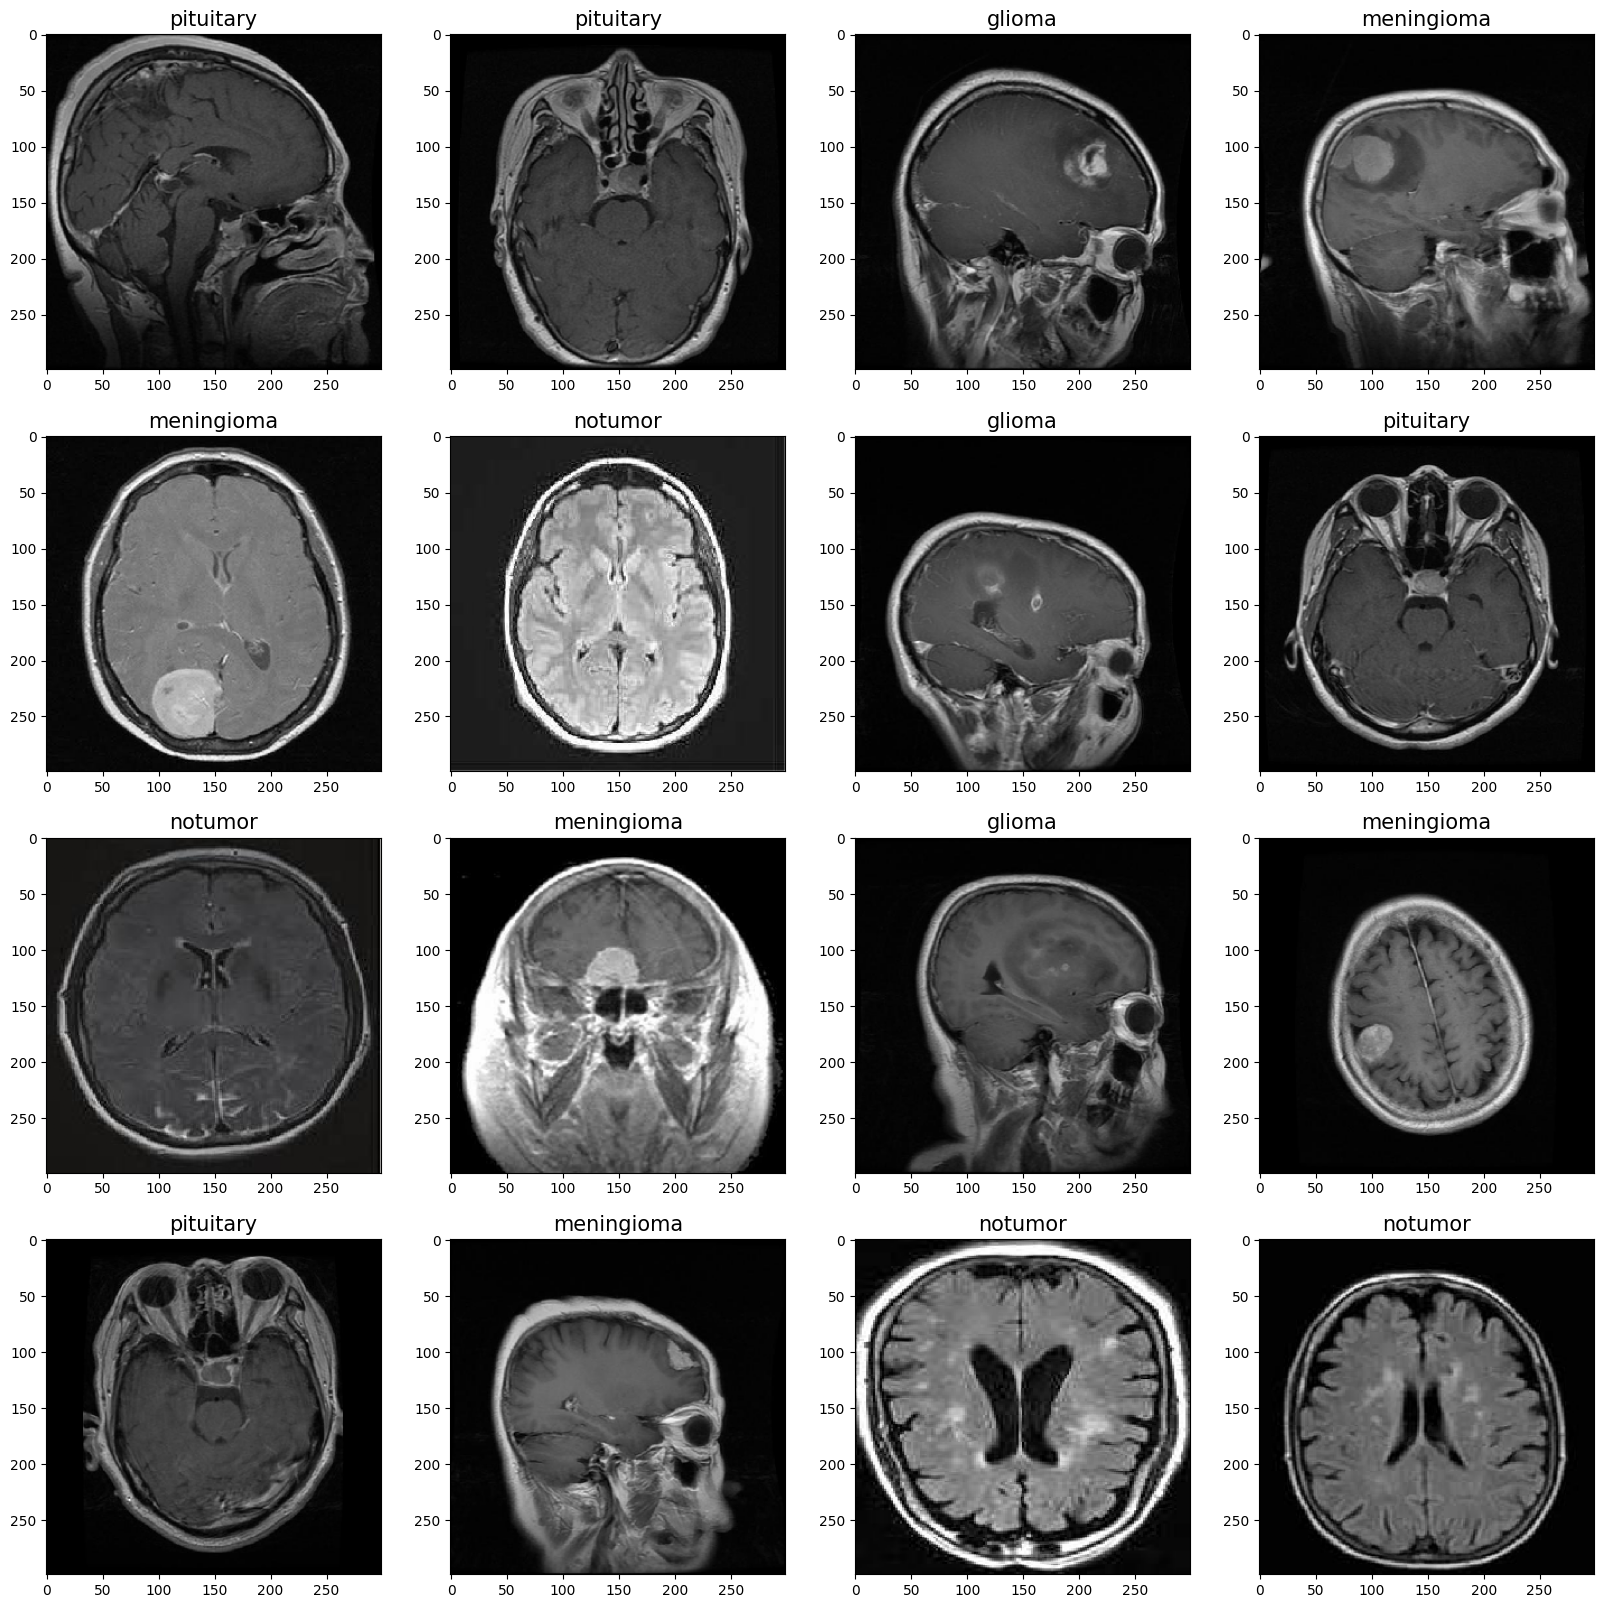

In [35]:
class_dict = train_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(test_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
   plt.subplot(4,4, i + 1)
   plt.imshow(image)
   class_name = classes[np.argmax(label)]
   plt.title(class_name, color='k', fontsize=15)

plt.show()

In [36]:
from tensorflow.keras import models, layers

def build_transfer_model_fine_tune(base_model, input_shape):
   base_model.trainable = False  
   model = models.Sequential()
   model.add(base_model)
   model.add(layers.GlobalAveragePooling2D())
   model.add(layers.BatchNormalization())
   model.add(layers.Dense(512))
   model.add(layers.ReLU())
   model.add(layers.Dropout(0.2))
   model.add(layers.Dense(256))
   model.add(layers.BatchNormalization())
   model.add(layers.Dense(4, activation='softmax'))  
   return model

In [37]:
import tensorflow as tf

def fine_tune_model(model, base_model, fine_tune_at):
   base_model.trainable = True
   for layer in base_model.layers[:fine_tune_at]:
      layer.trainable = False

   model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
   return model

In [38]:
input_shape=(299,299,3)
pretrained_models = {
   "Xception": tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=input_shape),
   "DenseNet201": tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape),
   "InceptionV3": tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape),
   "MobileNetV2": tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape),
   "EfficientNet-B3": tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
}

C:\Users\raywi\AppData\Local\Temp\ipykernel_24936\2867585018.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  "MobileNetV2": tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape),
C:\Users\raywi\AppData\Local\Temp\ipykernel_24936\2867585018.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  "EfficientNet-B3": tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


In [39]:
print(f"Total layer of base_model Xception : {len(pretrained_models['Xception'].layers)}")
print(f"Total layer of base_model DenseNet201 : {len(pretrained_models['DenseNet201'].layers)}")
print(f"Total layer of base_model InceptionV3 : {len(pretrained_models['InceptionV3'].layers)}")
print(f"Total layer of base_model MobileNetV2 : {len(pretrained_models['MobileNetV2'].layers)}")
print(f"Total layer of base_model EfficientNet-B3 : {len(pretrained_models['EfficientNet-B3'].layers)}")

Total layer of base_model Xception : 132
Total layer of base_model DenseNet201 : 707
Total layer of base_model InceptionV3 : 311
Total layer of base_model MobileNetV2 : 154
Total layer of base_model EfficientNet-B3 : 154


In [40]:
fine_tune_layers = {
   "Xception": 112,
   "DenseNet201": 687,
   "InceptionV3": 291,
   "MobileNetV2": 134,
   "EfficientNet-B3": 134,
}

In [41]:
model_Xception = 'Xception'
base_model = pretrained_models[model_Xception]

print("Traininng Xception")
transfer_model_Xception = build_transfer_model_fine_tune(base_model, input_shape)

transfer_model_Xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = transfer_model_Xception.fit(train_gen, epochs=10, validation_data=validation_gen)

print(f"Fine-tuning Xception...")
transfer_model_Xception = fine_tune_model(transfer_model_Xception, base_model, fine_tune_layers[model_Xception])

fine_tune_Xception_history = transfer_model_Xception.fit(train_gen, epochs=10, validation_data=validation_gen)

Traininng Xception
Epoch 1/10


c:\conda_folder\envs\AI-Enviroment\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 609s 3s/step - accuracy: 0.8015 - loss: 0.5921 - val_accuracy: 0.8748 - val_loss: 0.4155
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 593s 3s/step - accuracy: 0.9271 - loss: 0.2072 - val_accuracy: 0.9466 - val_loss: 0.1703
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 590s 3s/step - accuracy: 0.9607 - loss: 0.1097 - val_accuracy: 0.9542 - val_loss: 0.1744
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 591s 3s/step - accuracy: 0.9615 - loss: 0.0912 - val_accuracy: 0.9481 - val_loss: 0.1407
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 590s 3s/step - accuracy: 0.9669 - loss: 0.0916 - val_accuracy: 0.9588 - val_loss: 0.1494
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 595s 3s/step - accuracy: 0.9806 - loss: 0.0660 - val_accuracy: 0.9695 - val_loss: 0.1202
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 588s 3s/step - accuracy: 0.9755 - loss: 0.0714 - val_accuracy: 0.9573 - val_loss: 0.1466
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 587s 3s/step - accuracy: 0.9793 - loss: 0.0594 - val_accuracy: 0.969

In [42]:
model_DenseNet = 'DenseNet201'
base_model = pretrained_models[model_DenseNet]

print("Traininng DenseNet201")
transfer_model_DenseNet = build_transfer_model_fine_tune(base_model, input_shape)

transfer_model_DenseNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = transfer_model_DenseNet.fit(train_gen, epochs=10, validation_data=validation_gen)

print(f"Fine-tuning DenseNet201...")
transfer_model_DenseNet = fine_tune_model(transfer_model_DenseNet, base_model, fine_tune_layers[model_DenseNet])

fine_tune_DenseNet_history = transfer_model_DenseNet.fit(train_gen, epochs=10, validation_data=validation_gen)

Traininng DenseNet201
Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 779s 4s/step - accuracy: 0.8355 - loss: 0.5141 - val_accuracy: 0.9191 - val_loss: 0.2471
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 706s 4s/step - accuracy: 0.9486 - loss: 0.1459 - val_accuracy: 0.9405 - val_loss: 0.1763
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 701s 4s/step - accuracy: 0.9583 - loss: 0.1074 - val_accuracy: 0.9573 - val_loss: 0.1073
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 693s 4s/step - accuracy: 0.9793 - loss: 0.0626 - val_accuracy: 0.9664 - val_loss: 0.0797
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 695s 4s/step - accuracy: 0.9826 - loss: 0.0466 - val_accuracy: 0.9802 - val_loss: 0.0614
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 702s 4s/step - accuracy: 0.9830 - loss: 0.0537 - val_accuracy: 0.9618 - val_loss: 0.1327
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 700s 4s/step - accuracy: 0.9853 - loss: 0.0392 - val_accuracy: 0.9756 - val_loss: 0.0727
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 701s 4s/step - accuracy: 0.9881 - l

In [43]:
model_Inception = 'InceptionV3'
base_model = pretrained_models[model_Inception]

print("Traininng Inception")
transfer_model_Inception = build_transfer_model_fine_tune(base_model, input_shape)

transfer_model_Inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = transfer_model_Inception.fit(train_gen, epochs=10, validation_data=validation_gen)

print(f"Fine-tuning Inception...")
transfer_model_Inception = fine_tune_model(transfer_model_Inception, base_model, fine_tune_layers[model_Inception])

fine_tune_Inception_history = transfer_model_Inception.fit(train_gen, epochs=10, validation_data=validation_gen)

Traininng Inception
Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.7968 - loss: 0.6317 - val_accuracy: 0.9130 - val_loss: 0.2455
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9316 - loss: 0.1862 - val_accuracy: 0.9328 - val_loss: 0.1904
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.9529 - loss: 0.1306 - val_accuracy: 0.9221 - val_loss: 0.2053
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9588 - loss: 0.1115 - val_accuracy: 0.9557 - val_loss: 0.1223
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9736 - loss: 0.0708 - val_accuracy: 0.9588 - val_loss: 0.1131
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.9768 - loss: 0.0720 - val_accuracy: 0.9405 - val_loss: 0.1948
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9733 - loss: 0.0647 - val_accuracy: 0.9634 - val_loss: 0.1184
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9877 - los

In [46]:
model_MobileNetV2 = 'MobileNetV2'
base_model = pretrained_models[model_MobileNetV2]

print("Traininng Inception")
transfer_model_MobileNet = build_transfer_model_fine_tune(base_model, input_shape)

transfer_model_MobileNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = transfer_model_MobileNet.fit(train_gen, epochs=10, validation_data=validation_gen)

print(f"Fine-tuning Inception...")
transfer_model_MobileNet = fine_tune_model(transfer_model_MobileNet, base_model, fine_tune_layers[model_MobileNetV2])

fine_tune_mobile_history = transfer_model_MobileNet.fit(train_gen, epochs=10, validation_data=validation_gen)

Traininng Inception
Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 163s 867ms/step - accuracy: 0.8481 - loss: 0.4770 - val_accuracy: 0.9282 - val_loss: 0.1805
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 155s 858ms/step - accuracy: 0.9509 - loss: 0.1297 - val_accuracy: 0.9695 - val_loss: 0.1092
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 841ms/step - accuracy: 0.9718 - loss: 0.0763 - val_accuracy: 0.9557 - val_loss: 0.1385
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 842ms/step - accuracy: 0.9821 - loss: 0.0530 - val_accuracy: 0.9679 - val_loss: 0.0630
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 153s 848ms/step - accuracy: 0.9734 - loss: 0.0675 - val_accuracy: 0.9771 - val_loss: 0.0648
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 153s 848ms/step - accuracy: 0.9885 - loss: 0.0346 - val_accuracy: 0.9710 - val_loss: 0.0823
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 153s 851ms/step - accuracy: 0.9867 - loss: 0.0401 - val_accuracy: 0.9634 - val_loss: 0.1083
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 153s 850ms/step 

In [47]:
model_EfficientNet = 'EfficientNet-B3'
base_model = pretrained_models[model_EfficientNet]

print("Traininng Inception")
transfer_model_EfficientNet = build_transfer_model_fine_tune(base_model, input_shape)

transfer_model_EfficientNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = transfer_model_EfficientNet.fit(train_gen, epochs=10, validation_data=validation_gen)

print(f"Fine-tuning Inception...")
transfer_model_EfficientNet = fine_tune_model(transfer_model_EfficientNet, base_model, fine_tune_layers[model_EfficientNet])

fine_tune_Efficient_history = transfer_model_EfficientNet.fit(train_gen, epochs=10, validation_data=validation_gen)

Traininng Inception
Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 159s 849ms/step - accuracy: 0.8390 - loss: 0.5096 - val_accuracy: 0.9466 - val_loss: 0.1497
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 151s 838ms/step - accuracy: 0.9598 - loss: 0.1049 - val_accuracy: 0.9603 - val_loss: 0.1052
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 834ms/step - accuracy: 0.9787 - loss: 0.0698 - val_accuracy: 0.9511 - val_loss: 0.1202
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 835ms/step - accuracy: 0.9732 - loss: 0.0621 - val_accuracy: 0.9649 - val_loss: 0.0940
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 835ms/step - accuracy: 0.9863 - loss: 0.0421 - val_accuracy: 0.9634 - val_loss: 0.1004
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 157s 870ms/step - accuracy: 0.9832 - loss: 0.0476 - val_accuracy: 0.9695 - val_loss: 0.1063
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 181s 995ms/step - accuracy: 0.9844 - loss: 0.0443 - val_accuracy: 0.9679 - val_loss: 0.0942
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 153s 850ms/step 

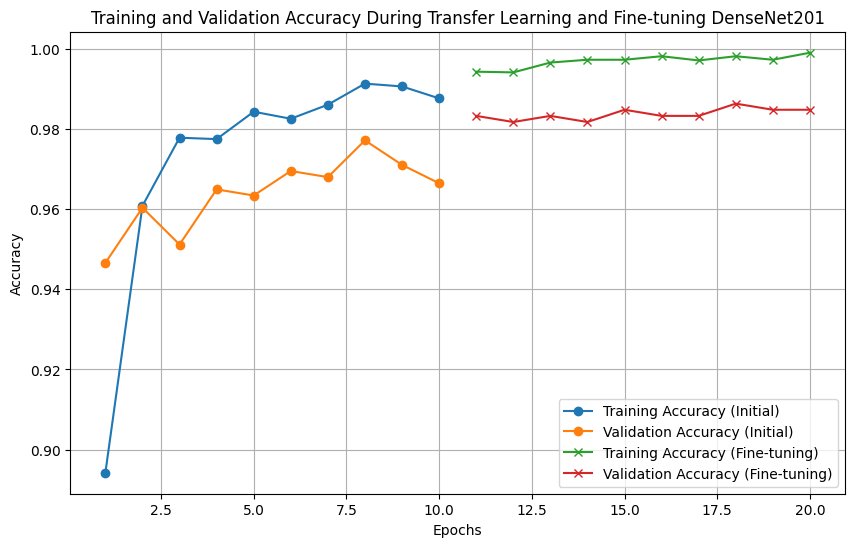

In [57]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy for initial training
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extract accuracy and validation accuracy for fine-tuning
fine_tune_train_acc = fine_tune_DenseNet_history.history['accuracy']
fine_tune_val_acc = fine_tune_DenseNet_history.history['val_accuracy']

# Generate a range of epochs for both stages
epochs_initial = range(1, len(train_acc) + 1)
epochs_fine_tune = range(len(train_acc) + 1, len(train_acc) + len(fine_tune_train_acc) + 1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(epochs_initial, train_acc, label='Training Accuracy (Initial)', marker='o')
plt.plot(epochs_initial, val_acc, label='Validation Accuracy (Initial)', marker='o')
plt.plot(epochs_fine_tune, fine_tune_train_acc, label='Training Accuracy (Fine-tuning)', marker='x')
plt.plot(epochs_fine_tune, fine_tune_val_acc, label='Validation Accuracy (Fine-tuning)', marker='x')

# Add labels, title, and legend
plt.title('Training and Validation Accuracy During Transfer Learning and Fine-tuning DenseNet201')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Show the plot
plt.show()


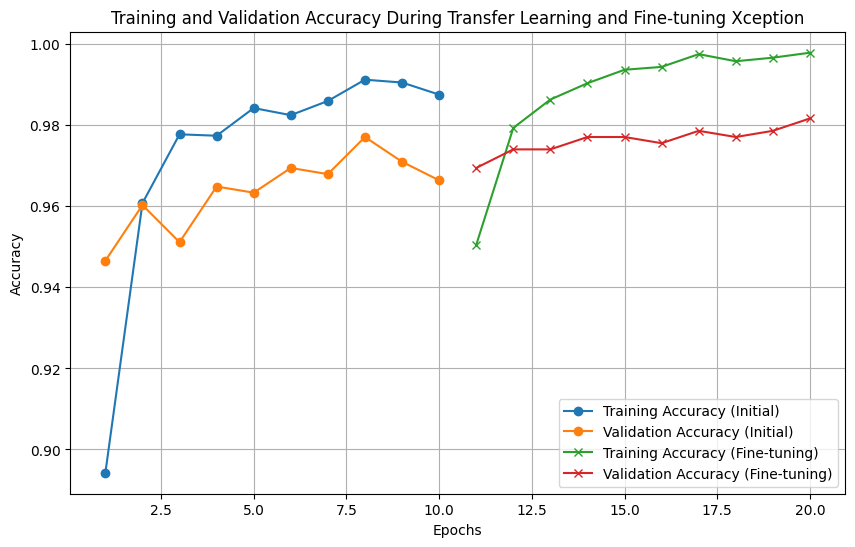

In [58]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy for initial training
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extract accuracy and validation accuracy for fine-tuning
fine_tune_train_acc = fine_tune_Xception_history.history['accuracy']
fine_tune_val_acc = fine_tune_Xception_history.history['val_accuracy']

# Generate a range of epochs for both stages
epochs_initial = range(1, len(train_acc) + 1)
epochs_fine_tune = range(len(train_acc) + 1, len(train_acc) + len(fine_tune_train_acc) + 1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(epochs_initial, train_acc, label='Training Accuracy (Initial)', marker='o')
plt.plot(epochs_initial, val_acc, label='Validation Accuracy (Initial)', marker='o')
plt.plot(epochs_fine_tune, fine_tune_train_acc, label='Training Accuracy (Fine-tuning)', marker='x')
plt.plot(epochs_fine_tune, fine_tune_val_acc, label='Validation Accuracy (Fine-tuning)', marker='x')

# Add labels, title, and legend
plt.title('Training and Validation Accuracy During Transfer Learning and Fine-tuning Xception')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Show the plot
plt.show()

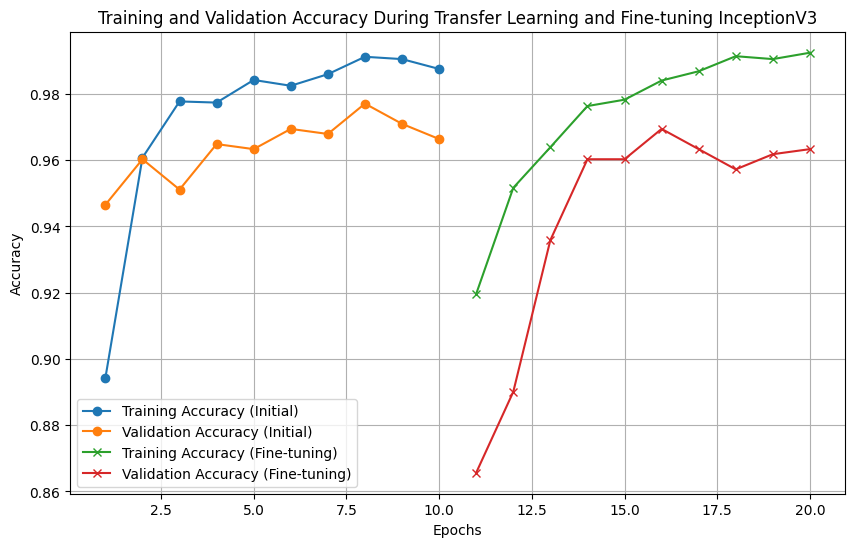

In [59]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy for initial training
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extract accuracy and validation accuracy for fine-tuning
fine_tune_train_acc = fine_tune_Inception_history.history['accuracy']
fine_tune_val_acc = fine_tune_Inception_history.history['val_accuracy']

# Generate a range of epochs for both stages
epochs_initial = range(1, len(train_acc) + 1)
epochs_fine_tune = range(len(train_acc) + 1, len(train_acc) + len(fine_tune_train_acc) + 1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(epochs_initial, train_acc, label='Training Accuracy (Initial)', marker='o')
plt.plot(epochs_initial, val_acc, label='Validation Accuracy (Initial)', marker='o')
plt.plot(epochs_fine_tune, fine_tune_train_acc, label='Training Accuracy (Fine-tuning)', marker='x')
plt.plot(epochs_fine_tune, fine_tune_val_acc, label='Validation Accuracy (Fine-tuning)', marker='x')

# Add labels, title, and legend
plt.title('Training and Validation Accuracy During Transfer Learning and Fine-tuning InceptionV3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Show the plot
plt.show()

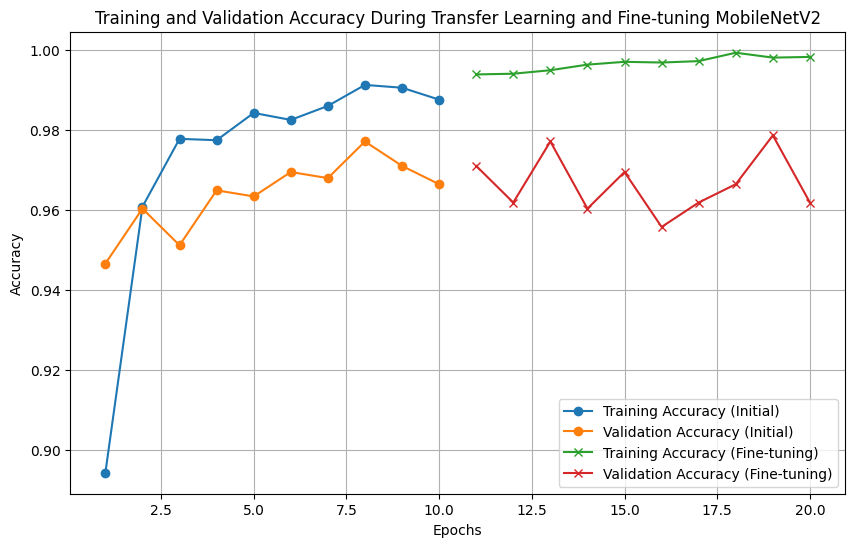

In [60]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy for initial training
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extract accuracy and validation accuracy for fine-tuning
fine_tune_train_acc = fine_tune_mobile_history.history['accuracy']
fine_tune_val_acc = fine_tune_mobile_history.history['val_accuracy']

# Generate a range of epochs for both stages
epochs_initial = range(1, len(train_acc) + 1)
epochs_fine_tune = range(len(train_acc) + 1, len(train_acc) + len(fine_tune_train_acc) + 1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(epochs_initial, train_acc, label='Training Accuracy (Initial)', marker='o')
plt.plot(epochs_initial, val_acc, label='Validation Accuracy (Initial)', marker='o')
plt.plot(epochs_fine_tune, fine_tune_train_acc, label='Training Accuracy (Fine-tuning)', marker='x')
plt.plot(epochs_fine_tune, fine_tune_val_acc, label='Validation Accuracy (Fine-tuning)', marker='x')

# Add labels, title, and legend
plt.title('Training and Validation Accuracy During Transfer Learning and Fine-tuning MobileNetV2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Show the plot
plt.show()

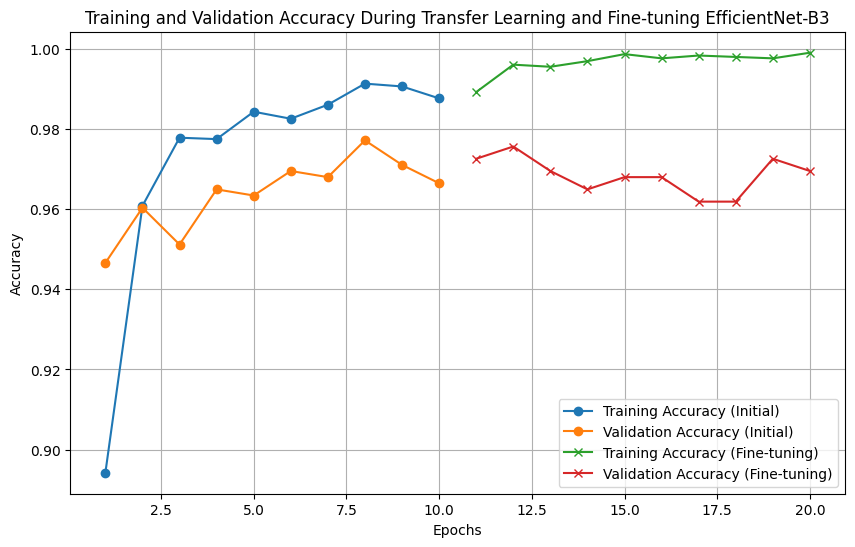

In [61]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy for initial training
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extract accuracy and validation accuracy for fine-tuning
fine_tune_train_acc = fine_tune_Efficient_history.history['accuracy']
fine_tune_val_acc = fine_tune_Efficient_history.history['val_accuracy']

# Generate a range of epochs for both stages
epochs_initial = range(1, len(train_acc) + 1)
epochs_fine_tune = range(len(train_acc) + 1, len(train_acc) + len(fine_tune_train_acc) + 1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(epochs_initial, train_acc, label='Training Accuracy (Initial)', marker='o')
plt.plot(epochs_initial, val_acc, label='Validation Accuracy (Initial)', marker='o')
plt.plot(epochs_fine_tune, fine_tune_train_acc, label='Training Accuracy (Fine-tuning)', marker='x')
plt.plot(epochs_fine_tune, fine_tune_val_acc, label='Validation Accuracy (Fine-tuning)', marker='x')

# Add labels, title, and legend
plt.title('Training and Validation Accuracy During Transfer Learning and Fine-tuning EfficientNet-B3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [69]:
loss, accuracy = transfer_model_Xception.evaluate(test_gen, verbose=1)
print(f"Test Loss Xception Model : {loss}, Accuracy test model Xception : {accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9747 - loss: 0.0805
Test Loss Xception Model : 0.06771884113550186, Accuracy test model Xception : 0.9771341681480408


In [70]:
loss, accuracy = transfer_model_DenseNet.evaluate(test_gen, verbose=1)
print(f"Test Loss DenseNet201 Model : {loss}, Accuracy test model DenseNet201 : {accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.9809 - loss: 0.0522
Test Loss DenseNet201 Model : 0.04619637131690979, Accuracy test model DenseNet201 : 0.9786585569381714


In [71]:
loss, accuracy = transfer_model_Inception.evaluate(test_gen, verbose=1)
print(f"Test Loss InceptionV3 Model : {loss}, Accuracy test model InceptionV3 : {accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9843 - loss: 0.0794
Test Loss InceptionV3 Model : 0.07559462636709213, Accuracy test model InceptionV3 : 0.9786585569381714


In [72]:
loss, accuracy = transfer_model_MobileNet.evaluate(test_gen, verbose=1)
print(f"Test Loss MobileNetV2 Model : {loss}, Accuracy test model MobileNetV2 : {accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 425ms/step - accuracy: 0.9573 - loss: 0.2091
Test Loss MobileNetV2 Model : 0.2025686353445053, Accuracy test model MobileNetV2 : 0.9649389982223511


In [73]:
loss, accuracy = transfer_model_EfficientNet.evaluate(test_gen, verbose=1)
print(f"Test Loss EfficientNet-B3 Model : {loss}, Accuracy test model EffcientNet-B3 : {accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 425ms/step - accuracy: 0.9672 - loss: 0.1786
Test Loss EfficientNet-B3 Model : 0.17324748635292053, Accuracy test model EffcientNet-B3 : 0.9725610017776489


In [85]:
prediction_Xception = transfer_model_Xception.predict(test_gen)
y_pred_Xception = np.argmax(prediction_Xception, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step


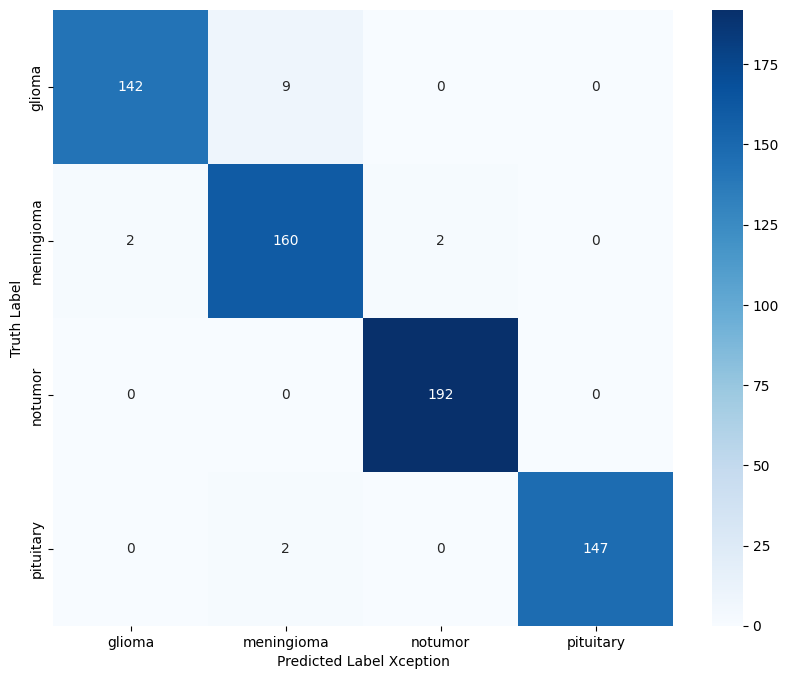

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(test_gen.classes, y_pred_Xception)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label Xception')
plt.ylabel('Truth Label')
plt.show()

In [87]:
classification_report_Xception = classification_report(test_gen.classes, y_pred_Xception)
print(classification_report_Xception)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       151
           1       0.94      0.98      0.96       164
           2       0.99      1.00      0.99       192
           3       1.00      0.99      0.99       149

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



In [88]:
prediction_DenseNet = transfer_model_DenseNet.predict(test_gen)
y_pred_DenseNet = np.argmax(prediction_DenseNet, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step


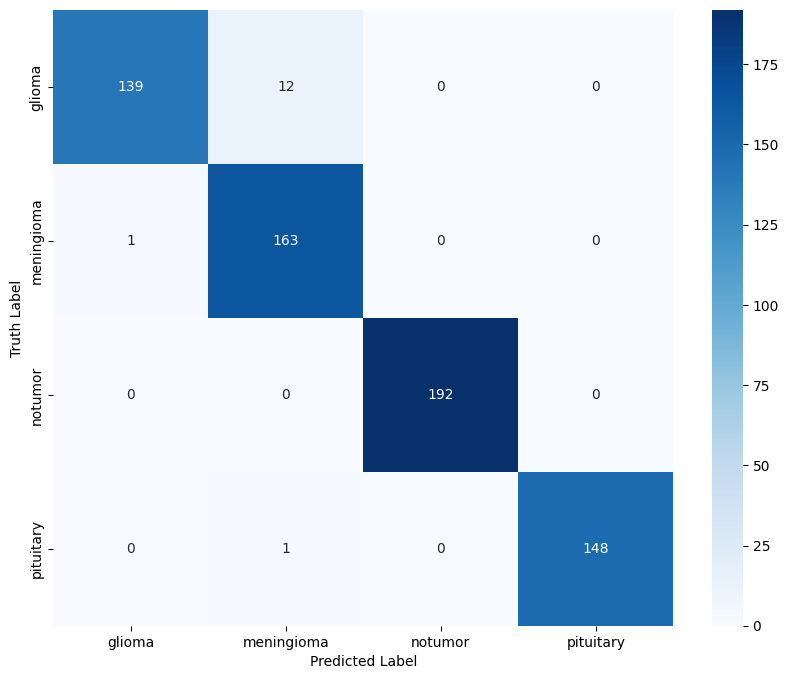

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(test_gen.classes, y_pred_DenseNet)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label DenseNet201')
plt.ylabel('Truth Label')
plt.show()

In [89]:
classification_report_DenseNet = classification_report(test_gen.classes, y_pred_DenseNet)
print(classification_report_DenseNet)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       151
           1       0.93      0.99      0.96       164
           2       1.00      1.00      1.00       192
           3       1.00      0.99      1.00       149

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



In [90]:
prediction_Inception = transfer_model_Inception.predict(test_gen)
y_pred_Inception = np.argmax(prediction_Inception, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step


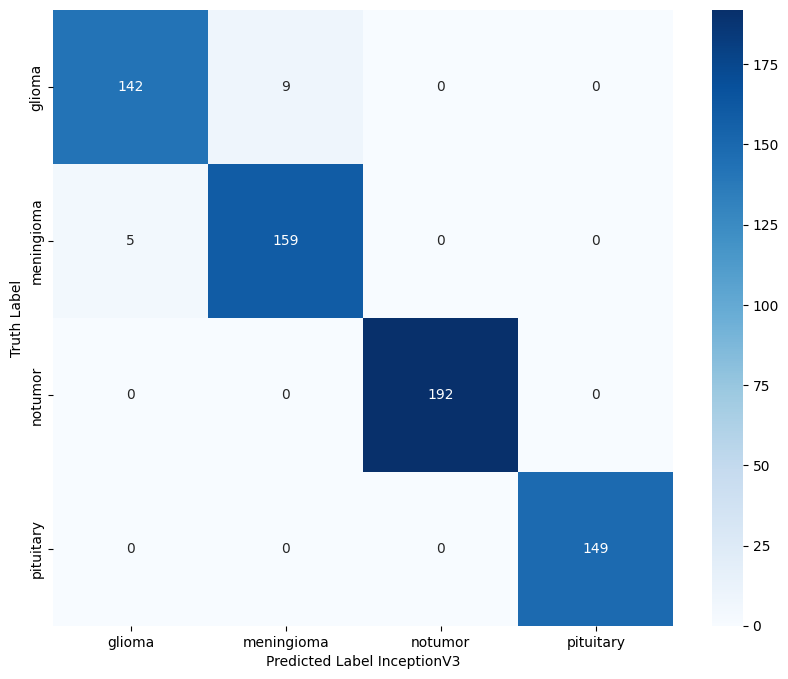

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(test_gen.classes, y_pred_Inception)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label InceptionV3')
plt.ylabel('Truth Label')
plt.show()

In [92]:
classification_report_Inception = classification_report(test_gen.classes, y_pred_Inception)
print(classification_report_Inception)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       151
           1       0.95      0.97      0.96       164
           2       1.00      1.00      1.00       192
           3       1.00      1.00      1.00       149

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



In [93]:
prediction_MobileNet = transfer_model_MobileNet.predict(test_gen)
y_pred_MobileNet = np.argmax(prediction_MobileNet, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 411ms/step


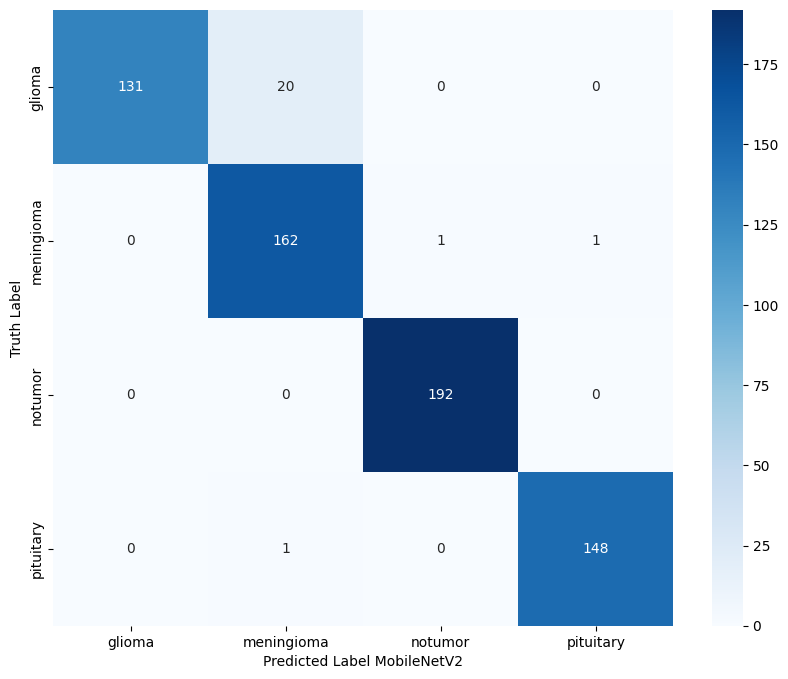

In [94]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(test_gen.classes, y_pred_MobileNet)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label MobileNetV2')
plt.ylabel('Truth Label')
plt.show()

In [95]:
classification_report_MobileNet = classification_report(test_gen.classes, y_pred_MobileNet)
print(classification_report_MobileNet)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       151
           1       0.89      0.99      0.93       164
           2       0.99      1.00      1.00       192
           3       0.99      0.99      0.99       149

    accuracy                           0.96       656
   macro avg       0.97      0.96      0.96       656
weighted avg       0.97      0.96      0.96       656



In [97]:
prediction_EfficientNet = transfer_model_EfficientNet.predict(test_gen)
y_pred_EfficientNet = np.argmax(prediction_EfficientNet, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 477ms/step


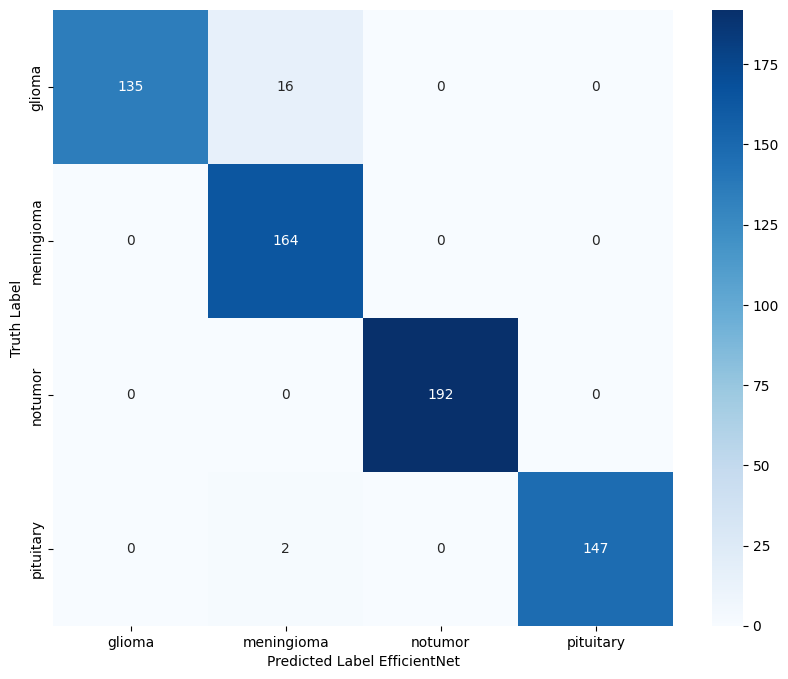

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(test_gen.classes, y_pred_EfficientNet)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label EfficientNet')
plt.ylabel('Truth Label')
plt.show()

In [99]:
classification_report_EfficientNet = classification_report(test_gen.classes, y_pred_EfficientNet)
print(classification_report_EfficientNet)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       151
           1       0.90      1.00      0.95       164
           2       1.00      1.00      1.00       192
           3       1.00      0.99      0.99       149

    accuracy                           0.97       656
   macro avg       0.98      0.97      0.97       656
weighted avg       0.98      0.97      0.97       656



In [128]:
def predict(img_path):
   import numpy as np
   import matplotlib.pyplot as plt
   from PIL import Image
   label = list(class_dict.keys())
   plt.figure(figsize=(20, 10))
   img = Image.open(img_path)
   resized_img = img.resize((299, 299))
   img = np.asarray(resized_img)
   img = np.expand_dims(img, axis=0)
   img = img / 255
   prediction_model = transfer_model_Xception.predict(img)
   probability = list(prediction_model[0])
   label_image = label
   plt.subplot(1, 2, 1)
   plt.imshow(resized_img)
   plt.subplot(1, 2, 2)
   bars = plt.barh(label_image, probability)
   plt.xlabel('Probability', fontsize=15)
   ax = plt.gca()
   ax.bar_label(bars, fmt = '%.2f')
   plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


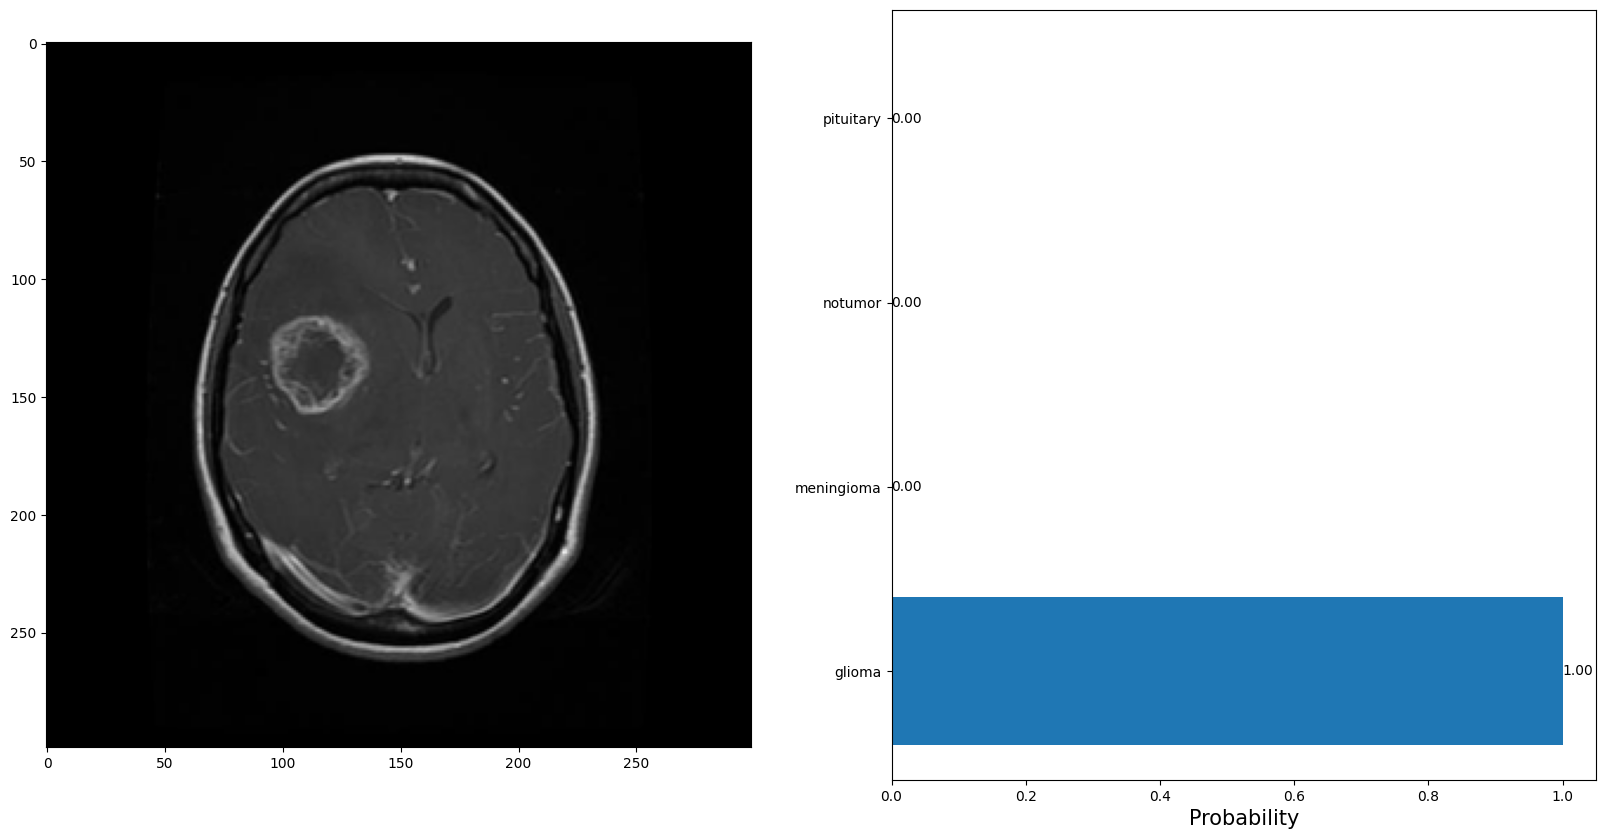

In [129]:
predict('./Testing/glioma/Te-gl_0014.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


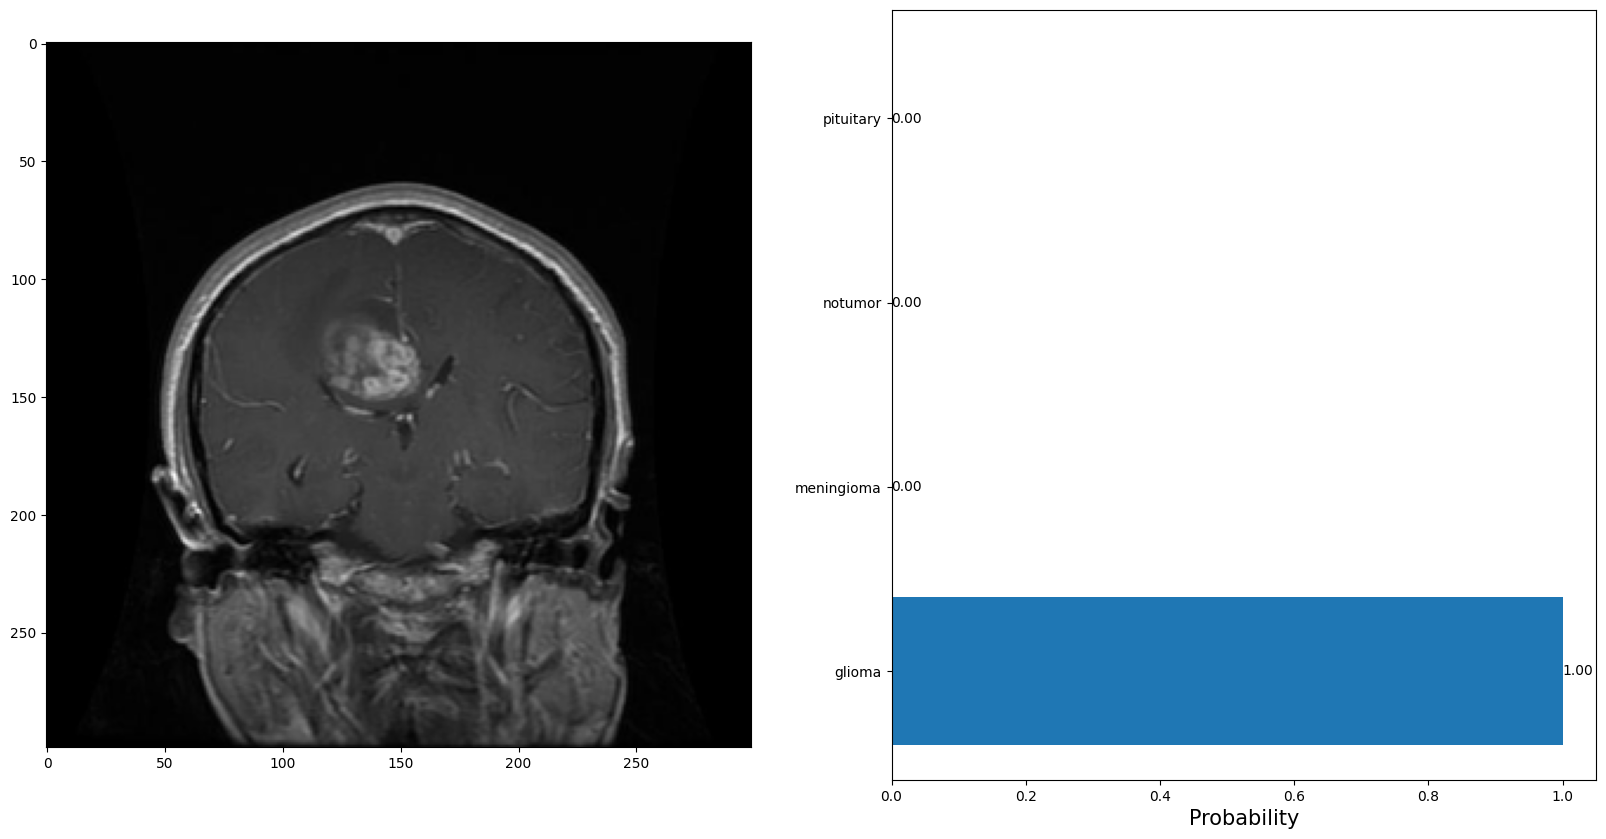

In [130]:
predict('./Testing/glioma/Te-gl_0040.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


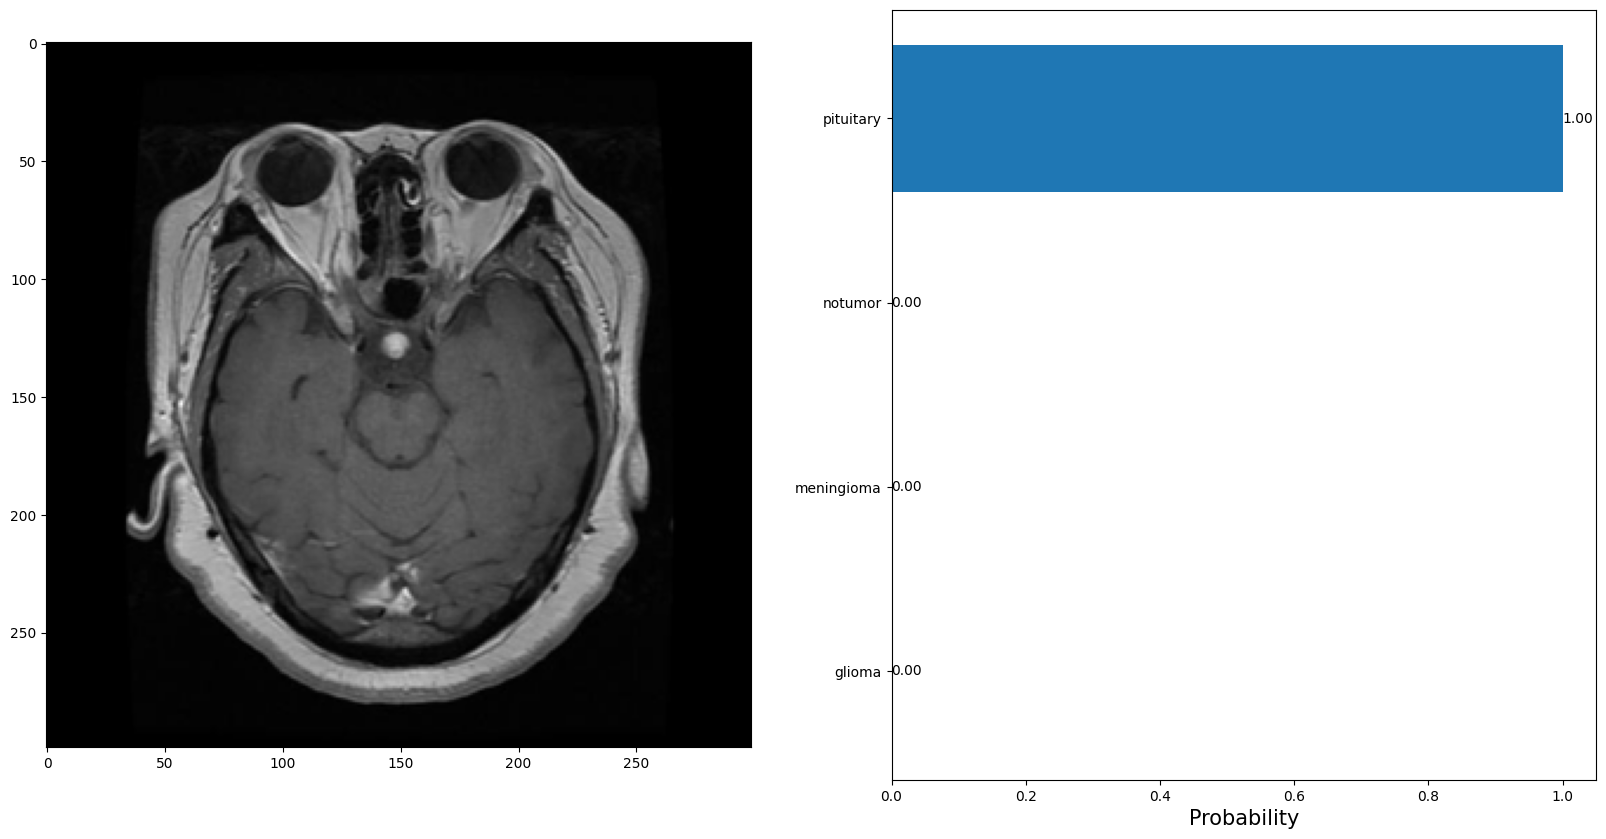

In [132]:
predict('./Testing/pituitary/Te-pi_0010.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


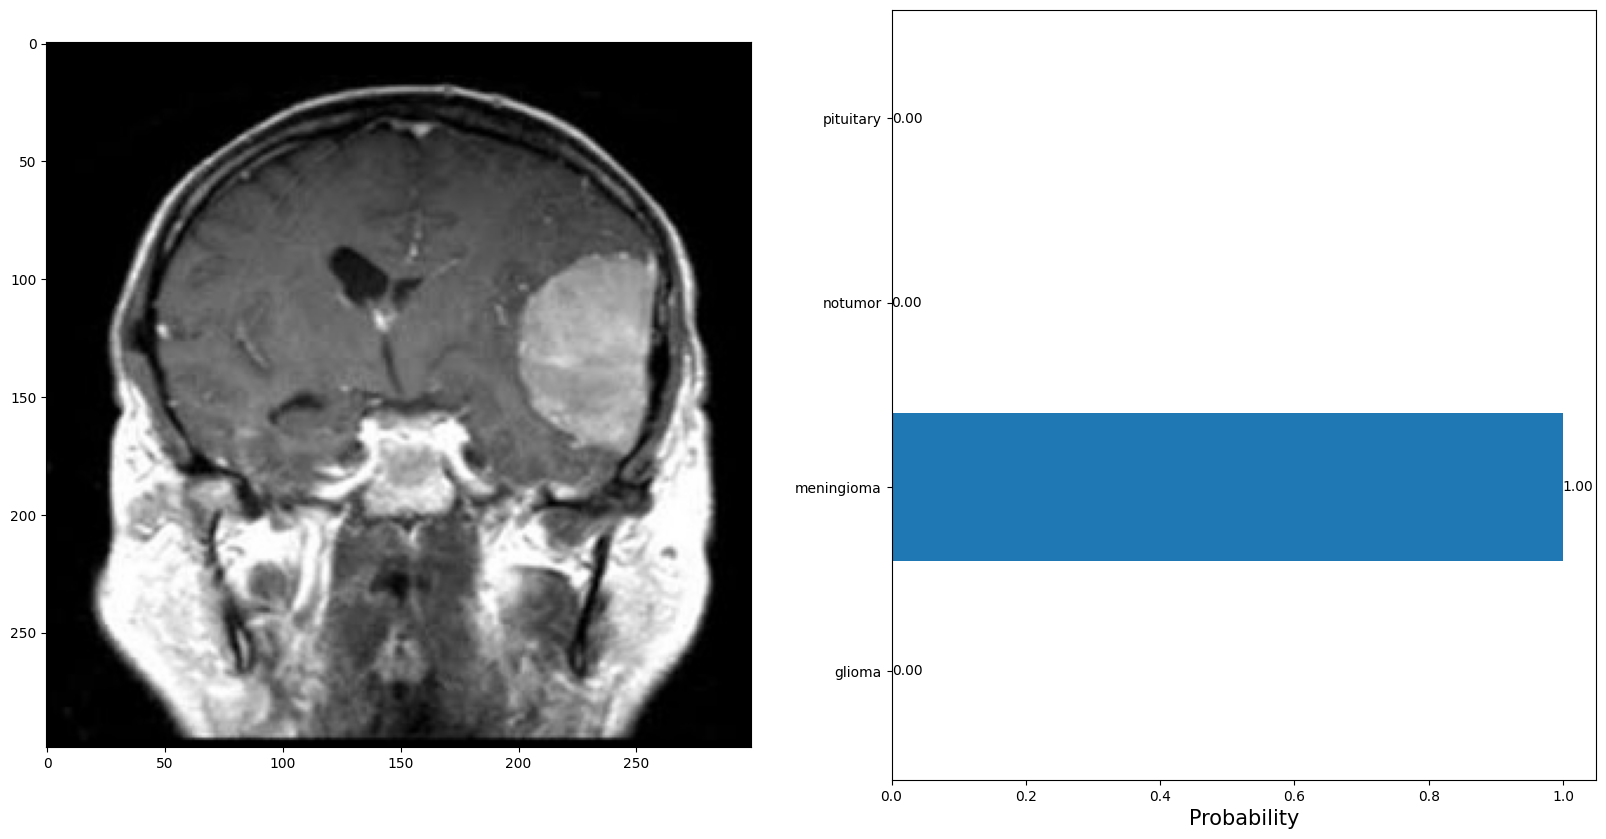

In [133]:
predict('./Testing/meningioma/Te-me_0016.jpg')

In [136]:
transfer_model_Xception.save('model_Xception.keras')

In [137]:
transfer_model_DenseNet.save('model_DenseNet201.keras')

In [138]:
transfer_model_Inception.save('model_InceptionV3.keras')

In [139]:
transfer_model_EfficientNet.save('model_EfficientNet-B3.keras')

In [140]:
transfer_model_MobileNet.save('model_MobileNetV2.keras')

In [141]:
transfer_model_DenseNet.save('model_DenseNet201.h5')
transfer_model_Inception.save('model_InceptionV3.h5')
transfer_model_EfficientNet.save('model_EfficientNet-B3.h5')